# Análise dos Datasets de Avaliação

Este notebook apresenta uma visão geral dos datasets utilizados para avaliar os projetos do hackathon.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

---
## 1. Classificação

### 1.1 Students Dropout

Dataset de uma instituição de ensino superior portuguesa para prever evasão, permanência ou graduação.

**Target:** `Target` (multiclasse: Dropout, Enrolled, Graduate)

**Colunas Categóricas (13):**
- `Marital status`, `Application mode`, `Course`, `Daytime/evening attendance`, `Previous qualification`
- `Nacionality`, `Mother's qualification`, `Father's qualification`, `Mother's occupation`, `Father's occupation`
- `Displaced`, `Educational special needs`, `Debtor`, `Tuition fees up to date`, `Gender`, `Scholarship holder`, `International`

**Colunas Numéricas (23):**
- `Application order`, `Previous qualification (grade)`, `Admission grade`, `Age at enrollment`
- `Curricular units 1st/2nd sem (credited, enrolled, evaluations, approved, grade, without evaluations)`
- `Unemployment rate`, `Inflation rate`, `GDP`

In [2]:
df_students = pd.read_csv('classificacao/students_dropout.csv')
print(f"Shape: {df_students.shape}")
print(f"\nDistribuição do target:")
print(df_students['Target'].value_counts())
print(f"\nTipos de dados:")
print(df_students.dtypes.value_counts())
df_students.head()

Shape: (4424, 37)

Distribuição do target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Tipos de dados:
int64      29
float64     7
object      1
Name: count, dtype: int64


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df_students.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### 1.2 Online Shoppers

Dataset de sessões de navegação em e-commerce para prever se a visita resultará em compra.

**Target:** `Revenue` (binário: True/False) - Classes desbalanceadas (15.5% positivos)

**Colunas Categóricas (8):**
- `Month` (mês da sessão)
- `OperatingSystems`, `Browser`, `Region`, `TrafficType` (códigos numéricos representando categorias)
- `VisitorType` (Returning_Visitor, New_Visitor, Other)
- `Weekend` (booleano)

**Colunas Numéricas (10):**
- `Administrative`, `Administrative_Duration` (páginas administrativas visitadas e tempo)
- `Informational`, `Informational_Duration` (páginas informacionais visitadas e tempo)
- `ProductRelated`, `ProductRelated_Duration` (páginas de produto visitadas e tempo)
- `BounceRates`, `ExitRates` (taxas de rejeição e saída)
- `PageValues` (valor médio das páginas visitadas)
- `SpecialDay` (proximidade de datas especiais)

In [4]:
df_shoppers = pd.read_csv('classificacao/online_shoppers.csv')
print(f"Shape: {df_shoppers.shape}")
print(f"\nDistribuição do target (Revenue):")
print(df_shoppers['Revenue'].value_counts())
print(f"\nTipos de dados:")
print(df_shoppers.dtypes)
df_shoppers.head()

Shape: (12330, 18)

Distribuição do target (Revenue):
Revenue
False    10422
True      1908
Name: count, dtype: int64

Tipos de dados:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df_shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### 1.3 Adult Census Income

Dataset do censo americano para prever se a renda anual é maior ou menor que $50K.

**Target:** `income` (binário: <=50K, >50K)

**Colunas Categóricas (9):**
- `workclass` (tipo de empregador: Private, Self-emp, Federal-gov, etc.)
- `education` (nível educacional: Bachelors, HS-grad, Masters, etc.)
- `marital_status` (estado civil)
- `occupation` (profissão)
- `relationship` (relação familiar: Husband, Wife, Own-child, etc.)
- `race` (raça)
- `sex` (sexo)
- `native_country` (país de origem)

**Colunas Numéricas (6):**
- `age` (idade)
- `fnlwgt` (peso final - número de pessoas que o censo acredita que a entrada representa)
- `education_num` (anos de educação)
- `capital_gain`, `capital_loss` (ganhos/perdas de capital)
- `hours_per_week` (horas trabalhadas por semana)

In [6]:
df_adult = pd.read_csv('classificacao/adult_census.csv')
print(f"Shape: {df_adult.shape}")
print(f"\nDistribuição do target (income):")
print(df_adult['income'].value_counts())
print(f"\nTipos de dados:")
print(df_adult.dtypes)
df_adult.head()

Shape: (48842, 15)

Distribuição do target (income):
income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Tipos de dados:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


---
## 2. Regressão

### 2.1 California Housing

Dataset para prever o valor mediano de casas em distritos da Califórnia.

**Target:** `median_house_value` (valor mediano das casas no distrito)

**Colunas Categóricas (1):**
- `ocean_proximity` (proximidade do oceano: NEAR BAY, INLAND, NEAR OCEAN, <1H OCEAN, ISLAND)

**Colunas Numéricas (8):**
- `longitude`, `latitude` (coordenadas geográficas)
- `housing_median_age` (idade mediana das casas)
- `total_rooms`, `total_bedrooms` (total de cômodos e quartos)
- `population`, `households` (população e número de domicílios)
- `median_income` (renda mediana dos moradores)

In [8]:
df_housing = pd.read_csv('regressao/california_housing.csv')
print(f"Shape: {df_housing.shape}")
print(f"\nValores nulos por coluna:")
print(df_housing.isnull().sum())
df_housing.head()

Shape: (20640, 10)

Valores nulos por coluna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2.2 Auto MPG

Dataset para prever o consumo de combustível (milhas por galão) de veículos.

**Target:** `mpg` (milhas por galão)

**Colunas Categóricas (0):**
- Nenhuma (todas numéricas)

**Colunas Numéricas (6):**
- `cylinders` (número de cilindros)
- `displacement` (cilindrada em polegadas cúbicas)
- `horsepower` (potência - contém alguns valores nulos)
- `weight` (peso do veículo em libras)
- `acceleration` (tempo de aceleração 0-60 mph)
- `model-year` (ano do modelo)

In [10]:
df_mpg = pd.read_csv('regressao/auto_mpg.csv')
print(f"Shape: {df_mpg.shape}")
print(f"\nValores nulos por coluna:")
print(df_mpg.isnull().sum())
df_mpg.head()

Shape: (398, 7)

Valores nulos por coluna:
mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [11]:
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### 2.3 Insurance

Dataset para prever custos de seguro de saúde. Contém outliers significativos.

**Target:** `charges` (custo do seguro de saúde)

**Colunas Categóricas (3):**
- `sex` (sexo: male, female)
- `smoker` (fumante: yes, no)
- `region` (região dos EUA: southwest, southeast, northwest, northeast)

**Colunas Numéricas (3):**
- `age` (idade)
- `bmi` (índice de massa corporal)
- `children` (número de dependentes)

In [12]:
df_insurance = pd.read_csv('regressao/insurance.csv')
print(f"Shape: {df_insurance.shape}")
print(f"\nTipos de dados:")
print(df_insurance.dtypes)
df_insurance.head()

Shape: (1338, 7)

Tipos de dados:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


---
## 3. Séries Temporais

### 3.1 Air Passengers

Série temporal clássica de passageiros aéreos mensais (1949-1960). Apresenta sazonalidade clara e tendência crescente.

**Target:** `Passengers` (número de passageiros em milhares)

**Coluna Temporal:** `Month` (formato: YYYY-MM)

**Características:** Série univariada, 144 observações mensais

In [14]:
df_air = pd.read_csv('series_temporais/air_passengers.csv')
print(f"Shape: {df_air.shape}")
print(f"\nPeríodo: {df_air['Month'].iloc[0]} a {df_air['Month'].iloc[-1]}")
df_air.head()

Shape: (144, 2)

Período: 1949-01 a 1960-12


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
df_air.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


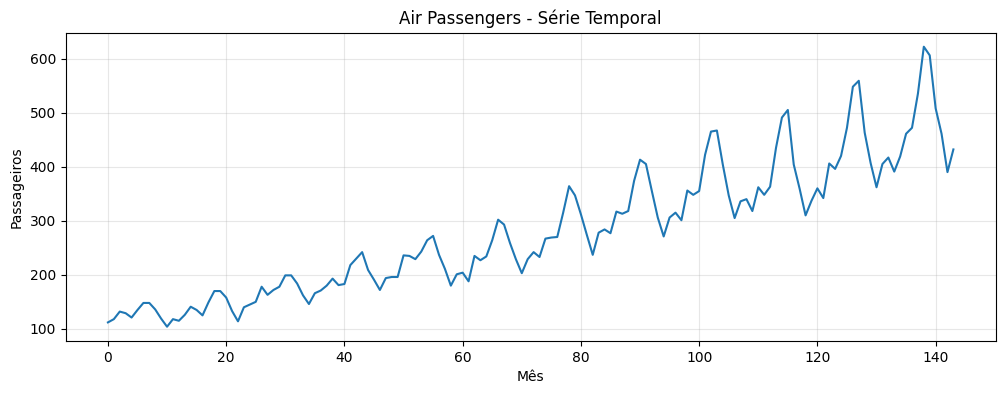

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(df_air['Passengers'])
plt.title('Air Passengers - Série Temporal')
plt.xlabel('Mês')
plt.ylabel('Passageiros')
plt.grid(True, alpha=0.3)
plt.show()

### 3.2 Daily Temperature

Série temporal de temperaturas mínimas diárias em Melbourne, Austrália (1981-1990).

**Target:** `Temperature` (temperatura mínima em graus Celsius)

**Coluna Temporal:** `Date` (formato: YYYY-MM-DD)

**Características:** Série univariada, 3.650 observações diárias, padrão sazonal anual

In [17]:
df_temp = pd.read_csv('series_temporais/daily_temperature.csv')
print(f"Shape: {df_temp.shape}")
print(f"\nPeríodo: {df_temp['Date'].iloc[0]} a {df_temp['Date'].iloc[-1]}")
df_temp.head()

Shape: (3650, 2)

Período: 1981-01-01 a 1990-12-31


,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [18]:
df_temp.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


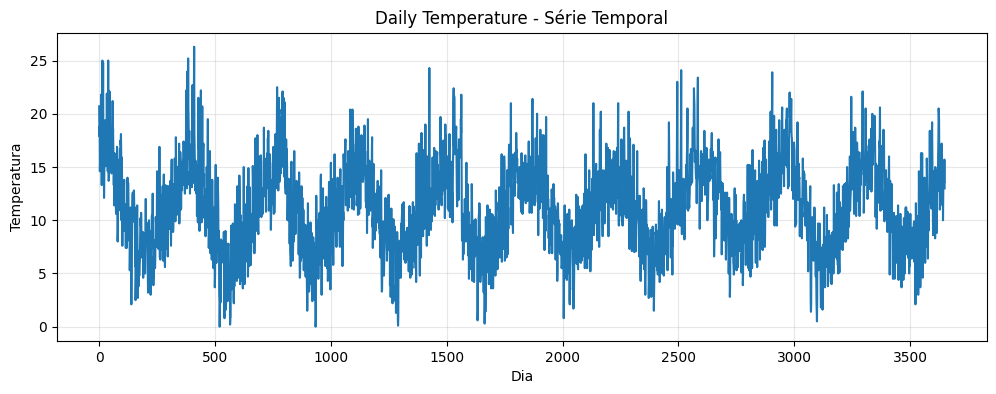

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(df_temp['Temperature'])
plt.title('Daily Temperature - Série Temporal')
plt.xlabel('Dia')
plt.ylabel('Temperatura')
plt.grid(True, alpha=0.3)
plt.show()

### 3.3 Retail Sales

Série temporal de vendas mensais de shampoo (3 anos).

**Target:** `Sales` (vendas em unidades)

**Coluna Temporal:** `Month` (formato: Y-MM)

**Características:** Série univariada curta (36 observações), tendência crescente

In [20]:
df_sales = pd.read_csv('series_temporais/retail_sales.csv')
print(f"Shape: {df_sales.shape}")
print(f"\nPeríodo: {df_sales['Month'].iloc[0]} a {df_sales['Month'].iloc[-1]}")
df_sales.head()

Shape: (36, 2)

Período: 1-01 a 3-12


,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [21]:
df_sales.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


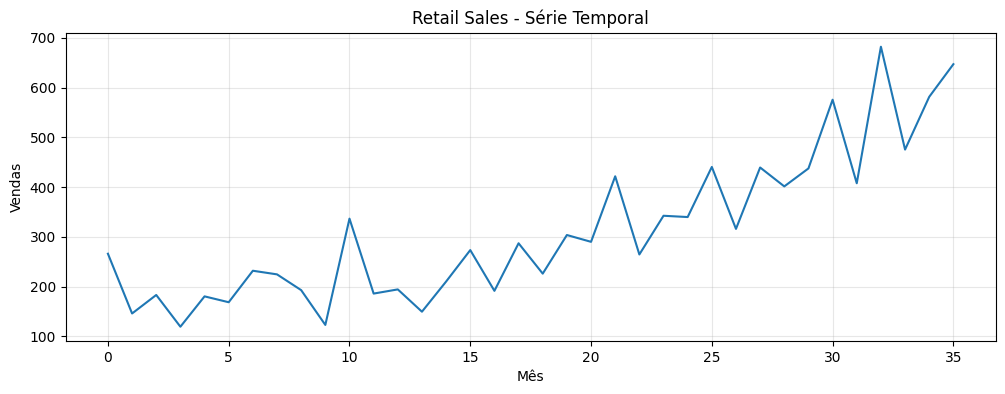

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(df_sales['Sales'])
plt.title('Retail Sales - Série Temporal')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True, alpha=0.3)
plt.show()

### 3.4 Store Sales (Múltiplas Séries)

Dataset sintético com vendas diárias por loja e produto. Cada série possui comportamento distinto (tendência, sazonalidade e volatilidade diferentes).

**Target:** `Sales` (vendas diárias)

**Coluna Temporal:** `Date` (formato: YYYY-MM-DD)

**Colunas de Agrupamento:**
- `Store` (identificador da loja: Store_1, Store_2, Store_3)
- `Product` (categoria: Electronics, Food, Clothing)

**Características:** 9 séries (3 lojas × 3 produtos), 1.096 dias cada, total 9.864 registros

**Comportamentos das séries:**
- Tendências: crescente forte, crescente leve, estacionária, decrescente
- Sazonalidade: amplitude variada por série
- Ruído: níveis diferentes de volatilidade

In [23]:
df_store = pd.read_csv('series_temporais/store_sales.csv')
print(f"Shape: {df_store.shape}")
print(f"\nPeríodo: {df_store['Date'].iloc[0]} a {df_store['Date'].iloc[-1]}")
print(f"\nLojas: {df_store['Store'].unique().tolist()}")
print(f"Produtos: {df_store['Product'].unique().tolist()}")
print(f"\nNúmero de séries: {df_store.groupby(['Store', 'Product']).ngroups}")
df_store.head(10)

Shape: (9864, 4)

Período: 2020-01-01 a 2022-12-31

Lojas: ['Store_1', 'Store_2', 'Store_3']
Produtos: ['Electronics', 'Food', 'Clothing']

Número de séries: 9


,Date,Store,Product,Sales
0,2020-01-01,Store_1,Electronics,114.97
1,2020-01-02,Store_1,Electronics,108.67
2,2020-01-03,Store_1,Electronics,116.58
3,2020-01-04,Store_1,Electronics,140.38
4,2020-01-05,Store_1,Electronics,122.86
5,2020-01-06,Store_1,Electronics,107.91
6,2020-01-07,Store_1,Electronics,126.09
7,2020-01-08,Store_1,Electronics,118.02
8,2020-01-09,Store_1,Electronics,105.71
9,2020-01-10,Store_1,Electronics,115.88


In [24]:
df_store.describe()

,Sales
count,9864.000000
mean,203.228628
std,112.897111
min,0.000000
25%,113.185000
50%,189.120000
75%,277.322500
max,555.380000


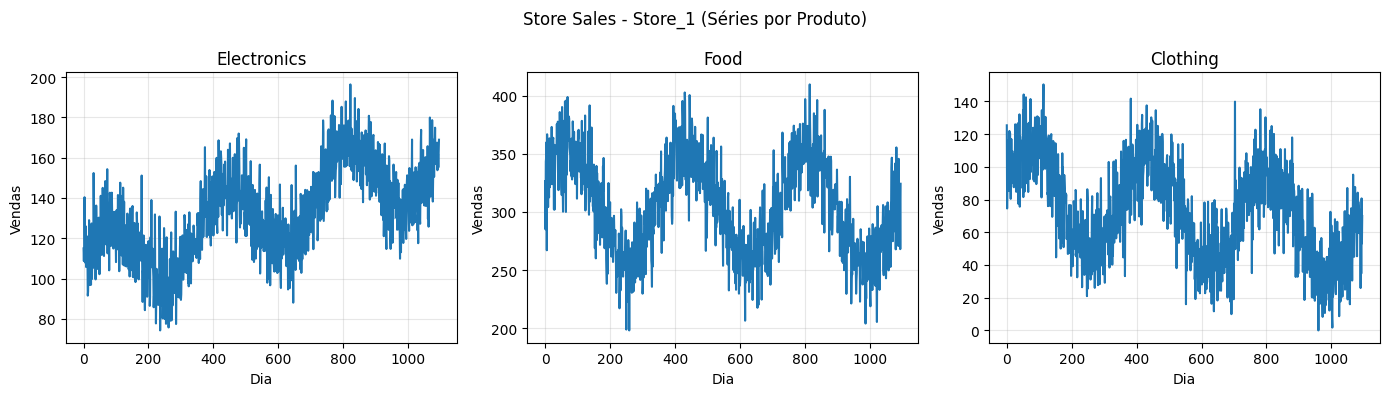

In [28]:
# Visualização de algumas séries (Store_1, todos os produtos)
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

store_1 = df_store[df_store['Store'] == 'Store_1']
products = store_1['Product'].unique()

for i, product in enumerate(products):
    data = store_1[store_1['Product'] == product]
    axes[i].plot(data['Sales'].values)
    axes[i].set_title(f'{product}')
    axes[i].set_xlabel('Dia')
    axes[i].set_ylabel('Vendas')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Store Sales - Store_1 (Séries por Produto)', fontsize=12)
plt.tight_layout()
plt.show()

---
## Resumo dos Datasets

| Tipo | Dataset | Registros | Features | Target |
|------|---------|-----------|----------|--------|
| Classificação | Students Dropout | 4.424 | 36 (13 cat + 23 num) | Target |
| Classificação | Online Shoppers | 12.330 | 17 (8 cat + 10 num) | Revenue |
| Classificação | Adult Census | 48.842 | 14 (9 cat + 6 num) | income |
| Regressão | California Housing | 20.640 | 9 | median_house_value |
| Regressão | Auto MPG | 398 | 8 | mpg |
| Regressão | Insurance | 1.338 | 6 | charges |
| Séries Temporais | Air Passengers | 144 | 1 | Passengers |
| Séries Temporais | Daily Temperature | 3.650 | 1 | Temperature |
| Séries Temporais | Retail Sales | 36 | 1 | Sales |
| Séries Temporais | Store Sales | 9.864 | 3 (Date, Store, Product) | Sales |

### Nota sobre os Datasets de Classificação

Os datasets de classificação possuem **colunas mistas** (categóricas e numéricas):

- **Students Dropout**: Dados acadêmicos e socioeconômicos de estudantes portugueses (multiclasse)
- **Online Shoppers**: Sessões de navegação em e-commerce (binário desbalanceado)
- **Adult Census**: Dados do censo americano para prever faixa de renda (binário, alto volume)

### Nota sobre Store Sales

O dataset **Store Sales** possui estrutura diferente dos demais:
- **Múltiplas séries**: 9 séries (3 lojas × 3 produtos)
- **Formato**: Date, Store, Product, Sales
- **Comportamentos distintos**: Cada série tem tendência, sazonalidade e ruído diferentes
- **Uso**: Testar previsão de múltiplas séries temporais simultaneamente